In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

In [2]:
df=pd.read_excel("DS1_C4_S9_Car_Data.xlsx")
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [5]:
df.describe()

,S. No.,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Width_mm,Doors,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Seating_Capacity
count,1276.000000,1264.000000,1210.000000,1174.000000,1207.000000,1275.000000,1276.000000,1264.000000,1272.000000,721.000000,476.000000,1276.000000,1274.000000,1270.000000
mean,637.500000,1858.804589,4.380992,3.977853,52.119221,1592.539608,4296.883730,1788.550506,4.550314,15.815381,16.879706,156.154545,265.313391,5.270079
std,368.493781,1063.152389,1.660957,0.833763,16.458956,151.669218,476.612977,150.932432,0.747816,8.954285,4.918816,136.186397,181.021642,1.145231
min,0.000000,72.000000,2.000000,1.000000,15.000000,1136.000000,4.640000,1.840000,2.000000,2.000000,4.000000,12.000000,8.300000,2.000000
25%,318.750000,1198.000000,4.000000,4.000000,40.000000,1495.000000,3991.750000,1695.000000,4.000000,11.500000,13.800000,83.000000,133.000000,5.000000
50%,637.500000,1497.000000,4.000000,4.000000,46.000000,1557.000000,4331.000000,1770.000000,5.000000,15.290000,17.190000,110.000000,209.000000,5.000000
75%,956.250000,1998.000000,4.000000,4.000000,60.000000,1666.000000,4620.000000,1852.500000,5.000000,19.200000,20.500000,173.000000,350.000000,5.000000
max,1275.000000,7993.000000,16.000000,16.000000,105.000000,2670.000000,6092.000000,2226.000000,5.000000,110.000000,25.600000,1600.000000,1600.000000,16.000000


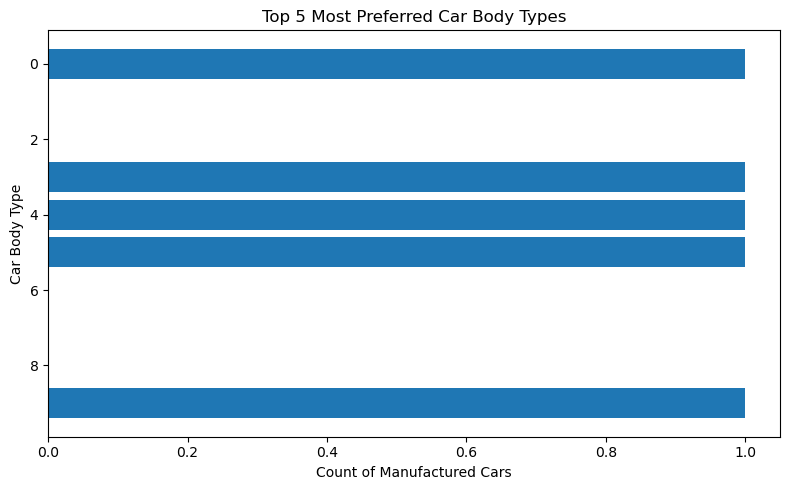

In [8]:
# Task 1

# Count the occurances of each car body type
if 'BodyType' in df.columns:
    counts=df['BodyType'].value_counts().sort_values(ascending=False)
else:
    # Try alternative column name if necessary
    counts=df.iloc[:, 0].value_counts().sort_values(ascending=False)

# Select the top 5 most preferred body types
top5=counts.head(5)

# Plot a horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(top5.index, top5.values)
plt.xlabel("Count of Manufactured Cars")
plt.ylabel("Car Body Type")
plt.title("Top 5 Most Preferred Car Body Types")
plt.gca().invert_yaxis() # Highest count at the top
plt.tight_layout()
plt.show()

In [9]:
# Task 2

# Check column names related to driving modes:
print(df.columns)

Index(['S. No.', 'Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre', 'Fuel_Type',
       'Height_mm', 'Length_mm', 'Width_mm', 'Body_Type', 'Doors',
       'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Kerb_Weight',
       'Power', 'Torque', 'Seating_Capacity', 'Central_Locking',
       'Child_Safety_Locks', 'Hill_Assist', 'Drive_Modes',
       'High_Speed_Alert_System', 'ABS_(Anti-lock_Braking_System)',
       'Gross_Vehicle_Weight', 'Airbags', 'Door_Ajar_Warning',
       'Fasten_Seat_Belt_Warning'],
      dtype='object')


In [10]:
# Filtering cars that support all five driving modes:
modes=["Normal", "Comfort", "Eco", "Sport", "Power"]

# Check if all the mode columns exist
if all(mode in df.columns for mode in modes):
    adaptable_cars=df[df[modes].eq('Yes').all(axis=1)]
    print("Cars with all modes:\n", adaptable_cars)
    print("\nTotal such cars:", adaptable_cars.shape[0])
else:
    print("One or more driving mode columns are missing.")

One or more driving mode columns are missing.


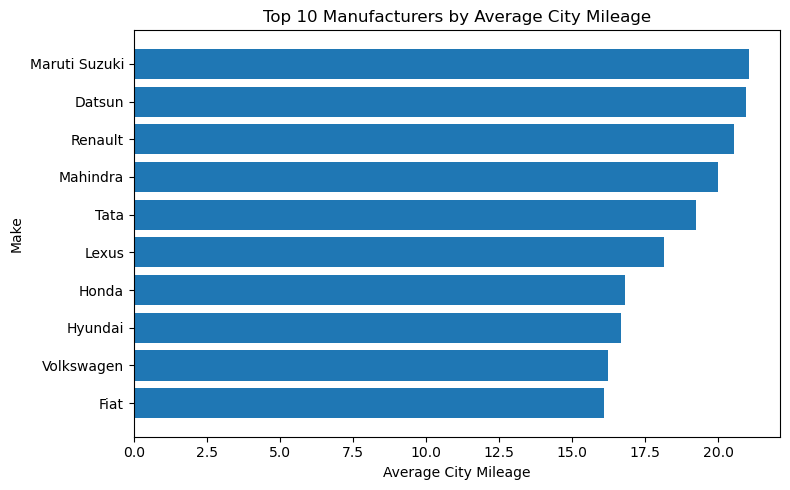

C:\Users\Msi\AppData\Local\Temp\ipykernel_18484\4142906479.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, vert=False, labels=top10.index)


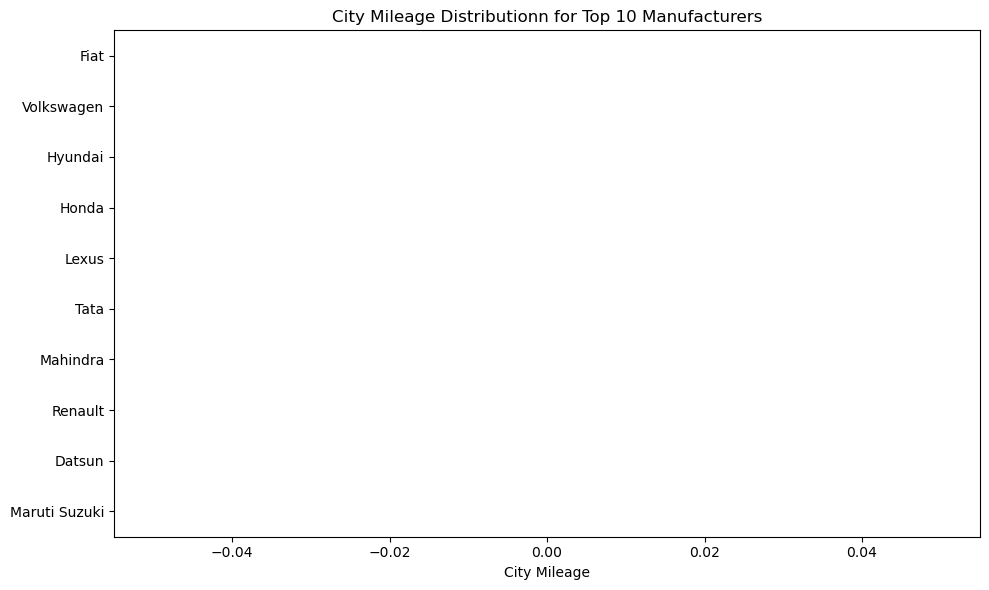

In [15]:
# Task 3

# Compute average city mileage per manufacturer and sort
manufacturer_mileage=df.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=False)
top10=manufacturer_mileage.head(10)

# Horizontal bar chart for top 10
plt.figure(figsize=(8,5))
plt.barh(top10.index, top10.values)
plt.xlabel("Average City Mileage")
plt.ylabel("Make")
plt.title("Top 10 Manufacturers by Average City Mileage")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Boxplot of CityMileage distributions for these top 10 manufacturers
plt.figure(figsize=(10,6))
data_to_plot=[df[df['Make']==m]['City_Mileage_km_litre'] for m in top10.index]
plt.boxplot(data_to_plot, vert=False, labels=top10.index)
plt.xlabel("City Mileage")
plt.title("City Mileage Distributionn for Top 10 Manufacturers")
plt.tight_layout()
plt.show()

# Outlier detection using IQR on CityMileage
Q1=df['City_Mileage_km_litre'].quantile(0.25)
Q3=df['City_Mileage_km_litre'].quantile(0.75)
IQR=Q3-Q1
lower_fence=Q1-1.5*IQR
upper_fence=Q3+1.5*IQR

outliers=df[(df['City_Mileage_km_litre']<lower_fence) | (df['City_Mileage_km_litre']>upper_fence)]

In [32]:
# Remove the single most extreme outlier (highest CityMileage)

# Comment on outlier handling
print("Removed the single extreme outlier(likely data entry anomaly) to prevent distortion of the mileage analysis. All other genuine data points are retained.")                                

SyntaxError: invalid syntax (434954762.py, line 3)

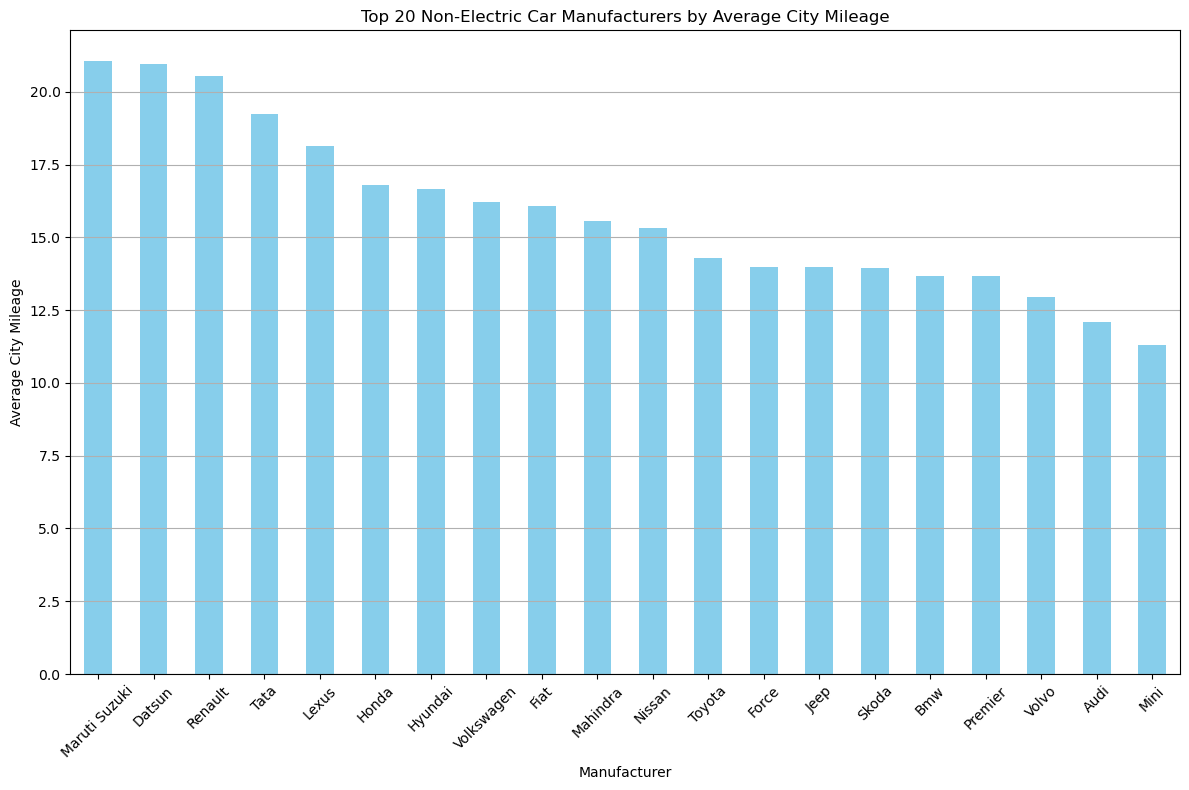

In [25]:
# Task 4

# Filter out electric cars
non_electric_cars=df[~df['Fuel_Type'].str.lower().str.contains('electric', na=False)]

# Group by manufacturer and compute average city mileage
top_20_non_electric=(non_electric_cars.groupby('Make')['City_Mileage_km_litre']
                     .mean()
                     .sort_values(ascending=False)
                     .head(20))

# Plot the result as a bar chart
plt.figure(figsize=(12, 8))
top_20_non_electric.plot(kind='bar', color='skyblue')
plt.title('Top 20 Non-Electric Car Manufacturers by Average City Mileage')
plt.xlabel('Manufacturer')
plt.ylabel('Average City Mileage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [37]:
# Task 5

# Filter the data for the selected manufacturers
selected_companies=['Hyundai', 'Mahindra', 'Renault', 'Skoda']
filtered_data=df[df['Make'].isin(selected_companies)]

# Prepare pivot tables
results={}

for company in selected_companies:
    company_data=filtered_data[filtered_data['Make']==company]
    results[company]={
        'Mean City Mileage': company_data['City_Mileage_km_litre'].mean(),
        'Median City Mileage': company_data['City_Mileage_km_litre'].median(),
        'Mean Highway Mileage': company_data['Highway_Mileage_km_litre'].mean(),
        'Median Highway Mileage': company_data['Highway_Mileage_km_litre'].median()
    }

# Convert to DataFrame
pivot_table=pd.DataFrame(results)
pivot_table.index.name= 'Make'
print(pivot_table)

                          Hyundai   Mahindra    Renault      Skoda
Make                                                              
Mean City Mileage       16.679853  20.003763  20.554286  13.953333
Median City Mileage     16.380000  16.000000  21.040000  14.500000
Mean Highway Mileage    18.294146  18.140175  17.690000  17.268529
Median Highway Mileage  18.500000  17.210000  19.600000  16.000000


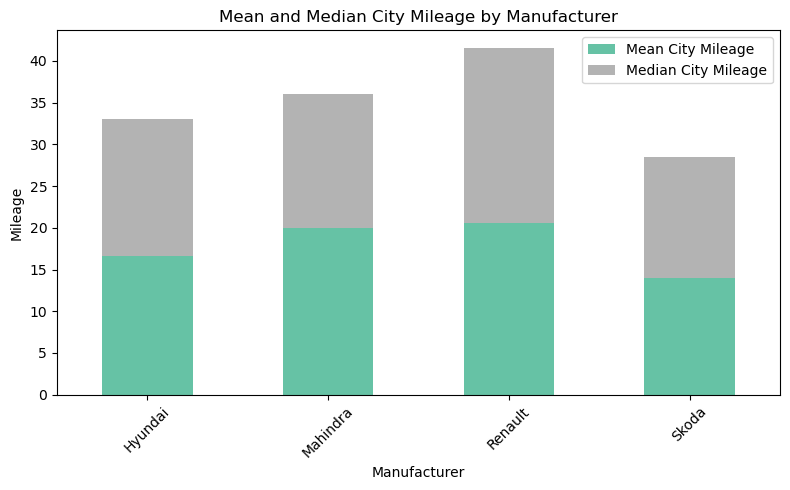

In [43]:
# Task 6

# Filter manufacturers
selected_companies=['Hyundai', 'Renault', 'Mahindra', 'Skoda']
filtered_data=df[df['Make'].isin(selected_companies)]

# Combine mean and median
mean_city=filtered_data.groupby('Make')['City_Mileage_km_litre'].mean()
median_city=filtered_data.groupby('Make')['City_Mileage_km_litre'].median()

# Combine into a DataFrame
summary_df=pd.DataFrame({'Mean City Mileage': mean_city,
                         'Median City Mileage': median_city})

# Plot stacked bar chart
summary_df.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))
plt.title('Mean and Median City Mileage by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mileage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

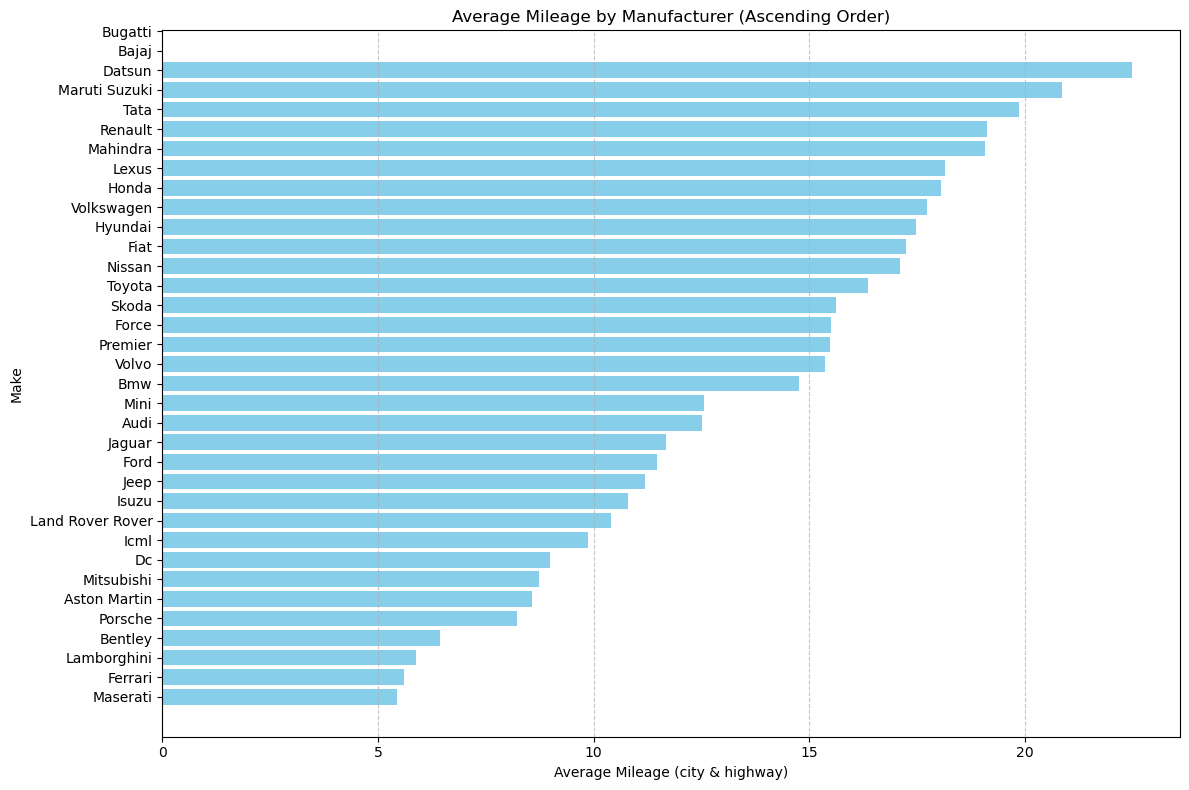

In [44]:
# Task 7

# 1. Group by 'Make' and compute mean city and highway mileage
grouped=(df.groupby('Make')[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']]
         .mean()
         .reset_index())

# 2. Compute overall average mileage
grouped['Average_Mileage']=grouped[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean(axis=1)

# 3. Sort by average mileage ascending
grouped_sorted=grouped.sort_values('Average_Mileage')

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(
    grouped_sorted['Make'],
    grouped_sorted['Average_Mileage'],
    color='skyblue')
plt.xlabel('Average Mileage (city & highway)')
plt.ylabel('Make')
plt.title('Average Mileage by Manufacturer (Ascending Order)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

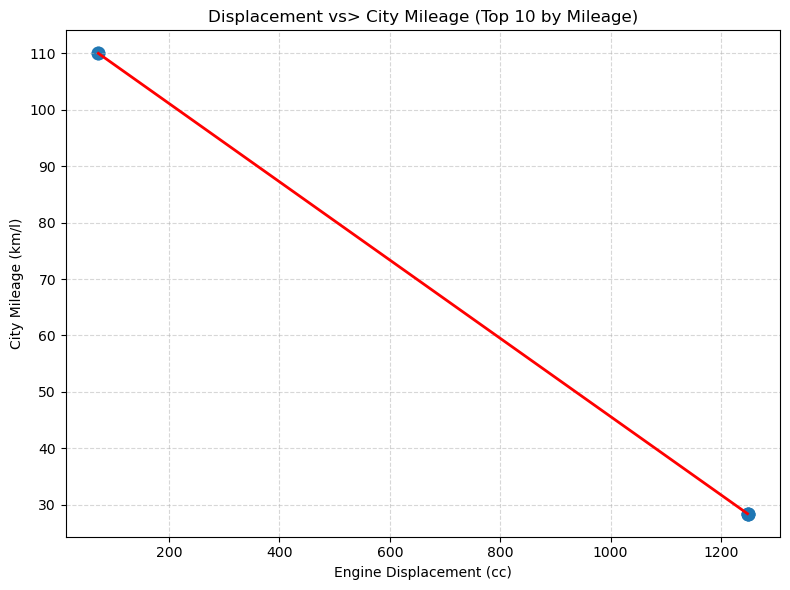

In [47]:
# Task 8

# Select the top 10 cars by city mileage
top10=df.nlargest(10, "City_Mileage_km_litre")

# Plot displacement vs. city mileage with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    data=top10,
    x="Displacement",
    y="City_Mileage_km_litre",
    marker="o",
    scatter_kws={"s": 80, "alpha": 0.7},
    line_kws={"color": "red", "lw": 2})
plt.title("Displacement vs> City Mileage (Top 10 by Mileage)")
plt.xlabel("Engine Displacement (cc)")
plt.ylabel("City Mileage (km/l)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Inference

# 1. Negative Correlation
# - The regression line slopes downward, indicating that as engine displacement increases, the city mileage tends to decrease. This is expected as larger engine usually consume more fuel.

# 2. Unusual Observations/Outliers
# - There are no ususual observations/outliers from this trend line but if there are any points that lie far from trend line(e.g., a car with high displacement yet unusually high city miloeage), that could signal a data entry error or a special fuel-efficiency tech or mechanism.

# 3. Resolution
# - First we need to verify the source data for that vehicle, ensure the displacement and mileage values are correct.
# - If it's indeed a data entry error, do outlier treatment and remove the outlier, correct or remove that row before moving ahead further.
# - But, if it's a genuine outlier(e.g., hybrid technology), it may be kept but need to treat it as a seperate segment in analysis.

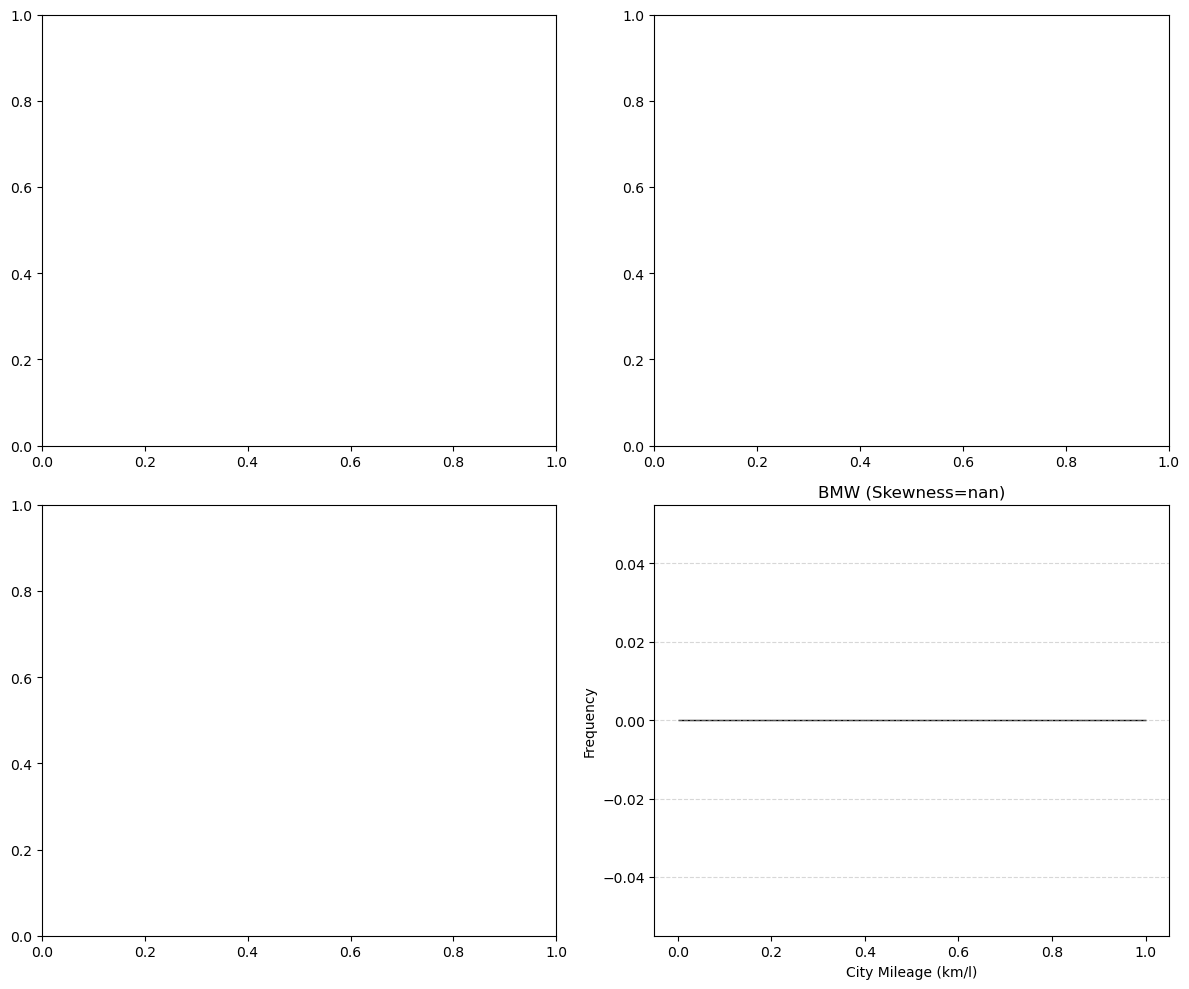

     Skewness
BMW       NaN


In [50]:
# Task 9

# Select the four manufacturers
makers=['Hyundai', 'Suzuki', 'Tata', 'BMW']

# Prepare subplots
fig, axes=plt.subplots(2, 2, figsize=(12, 10))
axes= axes.flatten()

# Collect skewness values
skewness={}

for ax, m in zip(axes, makers):
    # extract city-mileage series
    series=df.loc[df['Make']==m, 'City_Mileage_km_litre'].dropna()

# histogram
ax.hist(series, bins=15, edgecolor='black')
ax.set_title(f"{m} (Skewness={series.skew():.2f})")
ax.set_xlabel("City Mileage (km/l)")
ax.set_ylabel("Frequency")
ax.grid(axis='y', linestyle='--', alpha=0.5)

skewness[m]=series.skew()

plt.tight_layout()
plt.show()

# Summary of skewness
skew_df=pd.DataFrame.from_dict(skewness, orient='index', columns=['Skewness'])
print(skew_df)

In [52]:
# Task 10

# Columns to include
selected_columns=['Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement', 'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight']

# Create a copy of the selected data
df_selected=df[selected_columns].copy()

# Display missing value summary before treatment
print("Missing values before treatment:\n")
print(df_selected.isnull().sum())

# Handle missing values
# Numeric columns: fill with mean
numeric_cols=df_selected.select_dtypes(include=['float64', 'int64']).columns
df_selected[numeric_cols]=df_selected[numeric_cols].fillna(df_selected[numeric_cols].mean())

# Categorical columns: fill with mode
categorical_cols=df_selected.select_dtypes(include='object').columns
for col in categorical_cols:
    df_selected[col].fillna(df_selected[col].mode()[0], inplace=True)

# Confirm missing values are handled
print("\nMissing values after treatment:\n")
print(df_selected.isnull().sum())

# Display cleaned data info
print("\nCleaned DataFrame info:")
df_selected.info()

Missing values before treatment:

Valves_Per_Cylinder         102
Kerb_Weight                 365
Make                         75
Displacement                 12
Fuel_Tank_Capacity_litre     69
City_Mileage_km_litre       555
Highway_Mileage_km_litre    800
Power                         0
Torque                        2
Gross_Vehicle_Weight        595
dtype: int64

Missing values after treatment:

Valves_Per_Cylinder         0
Kerb_Weight                 0
Make                        0
Displacement                0
Fuel_Tank_Capacity_litre    0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
Power                       0
Torque                      0
Gross_Vehicle_Weight        0
dtype: int64

Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Valves_Per_Cylinder       1276 non-null

C:\Users\Msi\AppData\Local\Temp\ipykernel_18484\2647218879.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected[col].fillna(df_selected[col].mode()[0], inplace=True)


In [54]:
# Task 11

# Make a copy
df_processed=df_selected.copy()

# Step 1: Remove "kg", strip spacesw, and convert to numeric
df_processed['Kerb_Weight']=pd.to_numeric(
    df_processed['Kerb_Weight'].astype(str).str.replace('kg', '', regex=False).str.strip(), 
    errors='coerce'
)

df_processed['Gross_Vehicle_Weight']=pd.to_numeric(
    df_processed['Gross_Vehicle_Weight'].astype(str).str.replace('kg', '', regex=False).str.strip(),
    errors='coerce'
)

# Step 2: Convert from kg to pounds (multiply by 2.2)
df_processed['Kerb_Weight_lb']=df_processed['Kerb_Weight']*2.2
df_processed['Gross_Vehicle_Weight_lb']=df_processed['Gross_Vehicle_Weight']*2.2

# Step 3: View results
df_processed[['Kerb_Weight', 'Kerb_Weight_lb', 'Gross_Vehicle_Weight', 'Gross_Vehicle_Weight_lb']].head()

,Kerb_Weight,Kerb_Weight_lb,Gross_Vehicle_Weight,Gross_Vehicle_Weight_lb
0,660.0,1452.0,2510.0,5522.0
1,725.0,1595.0,2510.0,5522.0
2,710.0,1562.0,2510.0,5522.0
3,725.0,1595.0,2510.0,5522.0
4,725.0,1595.0,2510.0,5522.0


In [55]:
# Task 12

# Display the first few rows to understand the structure
df.head()

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Select relevant columns
columns_of_interest=['Make', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder']
df_selected=df[columns_of_interest].copy()

# Drop rows with missing values in selected columns
df_selected.dropna(inplace=True)

# Group by 'Make' and calculate statistics
grouped=df_selected.groupby('Make').agg(
    Displacement_Mean=('Displacement', 'mean'),
    Displacement_Median=('Displacement', 'median'),
    Displacement_Std=('Displacement', 'std'),
    Displacement_CV=('Displacement', lambda x: np.std(x) / np.mean(x)),

    Cylinders_Mean=('Cylinders', 'mean'),
    Cylinders_Median=('Cylinders', 'median'),
    Cylinders_Std=('Cylinders', 'std'),
    Cylinders_CV=('Cylinders', lambda x: np.std(x) / np.mean(x)),

    Valves_Mean=('Valves_Per_Cylinder', 'mean'),
    Valves_Median=('Valves_Per_Cylinder', 'median'),
    Valves_Std=('Valves_Per_Cylinder', 'std'),
    Valves_CV=('Valves_Per_Cylinder', lambda x: np.std(x) / np.mean(x))
)

grouped.sort_index()

,Displacement_Mean,Displacement_Median,Displacement_Std,Displacement_CV,Cylinders_Mean,Cylinders_Median,Cylinders_Std,Cylinders_CV,Valves_Mean,Valves_Median,Valves_Std,Valves_CV
Make,,,,,,,,,,,,
Aston Martin,5038.333333,5198.0,986.241519,0.159827,10.666667,12.0,2.309401,0.176777,4.000000,4.0,0.000000,0.000000
Audi,2276.241379,1984.0,861.982418,0.372100,5.241379,4.0,1.640017,0.307456,4.827586,4.0,3.094569,0.629869
Bentley,5447.833333,5974.0,1164.710164,0.195166,10.666667,12.0,2.065591,0.176777,4.000000,4.0,0.000000,0.000000
Bmw,2707.918919,2979.0,924.567237,0.336785,5.459459,6.0,1.608909,0.290691,4.000000,4.0,0.000000,0.000000
Bugatti,7993.000000,7993.0,0.000000,0.000000,16.000000,16.0,0.000000,0.000000,4.000000,4.0,0.000000,0.000000
Datsun,1065.066667,1198.0,179.470836,0.162793,3.000000,3.0,0.000000,0.000000,4.000000,4.0,0.000000,0.000000
Dc,2000.000000,2000.0,NaN,0.000000,4.000000,4.0,NaN,0.000000,4.000000,4.0,NaN,0.000000
Ferrari,4317.142857,3902.0,886.889025,0.190195,8.000000,8.0,0.000000,0.000000,4.000000,4.0,0.000000,0.000000
Fiat,1269.391304,1248.0,65.088568,0.050148,4.000000,4.0,0.000000,0.000000,4.000000,4.0,0.000000,0.000000


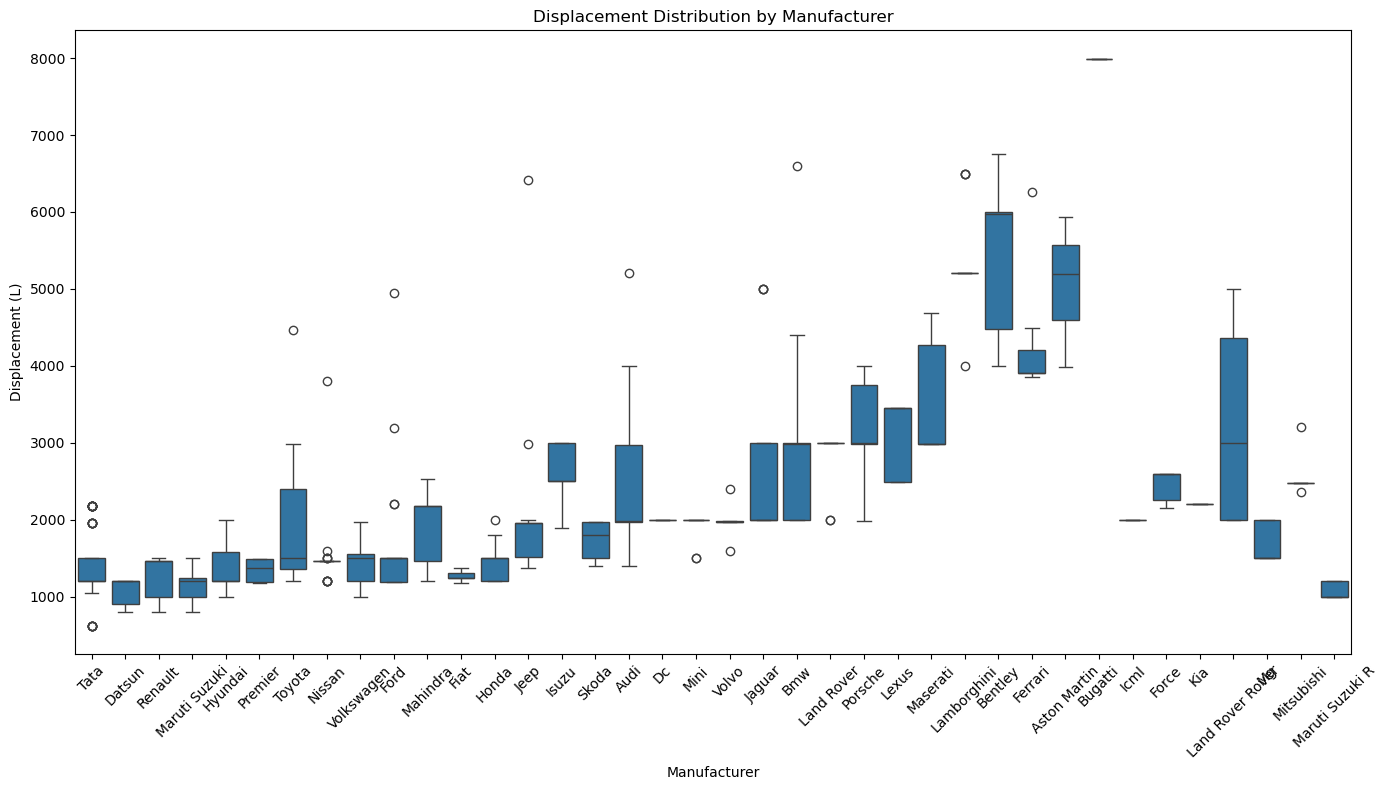

In [58]:
# Box plot of Displacement By Manufacturer(Make).

# Set plot style
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_selected, x='Make', y='Displacement')
plt.xticks(rotation=45)
plt.title('Displacement Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Displacement (L)')
plt.tight_layout()

plt.show()

C:\Users\Msi\AppData\Local\Temp\ipykernel_18484\2125616713.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corrs.values, y=top_corrs.index, ax=ax, palette='viridis')


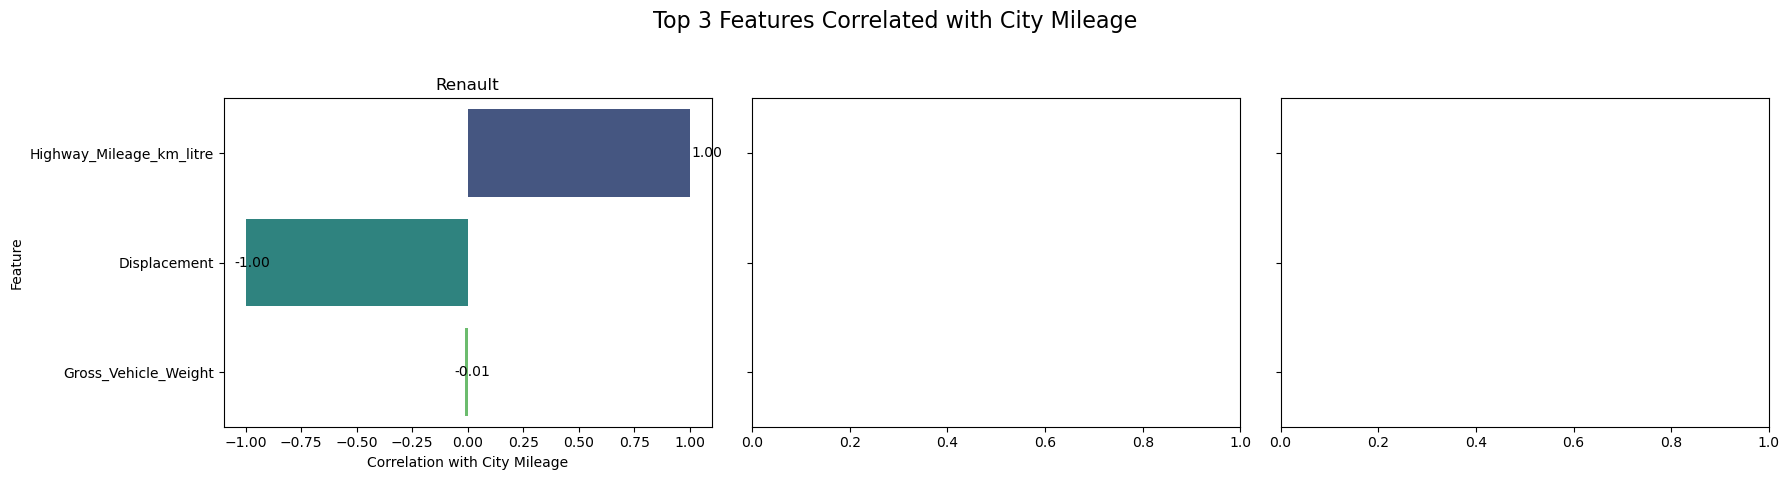

C:\Users\Msi\AppData\Local\Temp\ipykernel_18484\2125616713.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corrs.values, y=top_corrs.index, ax=ax, palette='viridis')


<Figure size 640x480 with 0 Axes>

C:\Users\Msi\AppData\Local\Temp\ipykernel_18484\2125616713.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corrs.values, y=top_corrs.index, ax=ax, palette='viridis')


<Figure size 640x480 with 0 Axes>

In [67]:
# Task 13

# Preprocess weight columns: remove 'kg' and convert to numeric
for col in ['Kerb_Weight', 'Gross_Vehicle_Weight']:
    df[col]=(df[col].astype(str)
             .str.replace('kg', '', regex=False)
             .str.strip()
             .replace('', np.nan))
    df[col]=pd.to_numeric(df[col], errors='coerce')

# Select relevant numeric features
numeric_cols=[
    'Displacement', 'Cylinders', 'Valves_Per_Cylinder',
    'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre',
    'Highway_Mileage_km_litre', 'Kerb_Weight', 'Gross_Vehicle_Weight'
]

# Manufacturers to analyse
makers=['Renault', 'Toyota', 'Honda']

# Set up the plot area
fig, axes=plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Top 3 Features Correlated with City Mileage', fontsize=16)

# Loop through each manufacturer
for ax, maker in zip(axes, makers):
    sub_df=df[df['Make']==maker].dropna(subset=numeric_cols)
    # Compute correlation with City Mileage
    corr_series=sub_df[numeric_cols].corr()['City_Mileage_km_litre'].drop('City_Mileage_km_litre')
    # Select top 3 by absolute correlation
    top3=corr_series.abs().sort_values(ascending=False).head(3).index
    top_corrs=corr_series[top3]
    if top_corrs.isna().all():
        print(f"{brand} - All correlations are NaN.")
        continue


    # Plot bar chart of correlation coefficients
    sns.barplot(x=top_corrs.values, y=top_corrs.index, ax=ax, palette='viridis')
    ax.set_title(maker)
    ax.set_xlabel('Correlation with City Mileage')
    ax.set_ylabel('Feature')
    for i, v in enumerate(top_corrs.values):
        ax.text(v+0.01 if v>0 else v-0.05, i, f"{v:.2f}", color='black', va='center')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [70]:
# Task 14

# Clean Weights
for col in ['Kerb_Weight', 'Gross_Vehicle_Weight']:
    df[col]=df[col].astype(str).str.replace('kg', '', regex=False).str.strip()
    df[col]=pd.to_numeric(df[col], errors='coerce')

# Aggregate stats
agg_stats=df.groupby('Make').agg({'Kerb_Weight': ['mean', 'median', 'std'],
                                  'Gross_Vehicle_Weight': ['mean', 'median', 'std']
                                 })
# Flatten columns
agg_stats.columns=['Kerb_Mean', 'Kerb_Median', 'Kerb_Std',
                   'Gross_Mean', 'Gross_Median', 'Gross_Std'
                  ]
# Calculate CV
agg_stats['Kerb_CV']=agg_stats['Kerb_Std']/agg_stats['Kerb_Mean']
agg_stats['Gross_CV']=agg_stats['Gross_Std']/agg_stats['Gross_Mean']

# Reset index and round
result=agg_stats.reset_index().round(2)

print(result)

                Make  Kerb_Mean  Kerb_Median  Kerb_Std  Gross_Mean  \
0       Aston Martin    1733.33       1680.0    234.59     2081.00   
1               Audi    1810.00       1780.0    342.38     2295.86   
2              Bajaj        NaN          NaN       NaN         NaN   
3            Bentley    2457.83       2425.0    122.26     3065.67   
4                Bmw    1716.05       1705.0    114.83     2314.44   
5            Bugatti    1995.00       1995.0      0.00         NaN   
6             Datsun     864.00        864.0      0.00         NaN   
7                 Dc    1580.00       1580.0       NaN     1580.00   
8            Ferrari    1633.75       1577.5    204.38         NaN   
9               Fiat    1200.95       1215.0     53.37     1273.00   
10             Force        NaN          NaN       NaN     2642.50   
11              Ford    1270.24       1220.0    370.62     1681.25   
12             Honda    1121.58       1093.5    156.38     1238.06   
13           Hyundai